In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import scipy.io

In [2]:
#dummy data
"""
No of feature is 3 & data length is 4
"""
d_X = np.matrix([[1,1],[2,2],[3,3],[4,4]])
d_y = np.matrix([1,2,3,4])
d_theta = np.matrix([0,0])
np.shape(d_X) , np.shape(d_y) , np.shape(d_theta)

((4, 2), (1, 4), (1, 2))

In [3]:
# """
# Txt to CSV

# """
# data = pd.read_csv("ex1data1.txt")
# data.to_csv(r'ex1data1.csv' , index=False)

In [4]:
data = pd.read_csv(r"ex1data1.csv")
data.columns = ["x" , "y"]
data

,x,y
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


In [5]:
X0 = data['x']
y = np.matrix(data["y"] , dtype=float)
X = []
for i in range(len(X0)):
    X.append([1 , X0[i]])
X = np.matrix(X , dtype=float)
theta = np.matrix([0,0] , dtype=float)
np.shape(X) , np.shape(y) , np.shape(theta)

((96, 2), (1, 96), (1, 2))

<html>
    <body>
        <h4>
            <h2>Functions:</h2>
            hypothisis<br>
            cost<br>
            gradient descent<br>
        </h4>
    </body>
</html>

<html>
    <body>
        <h5>
            input data = theta & X<br>
            output data = h(x) = prediction
        </h5>
    </body>
</html>

In [6]:
def hypothisis(x, theta):
    return theta * x.T
hypothisis(X, theta) , np.shape(hypothisis(X, theta))

(matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 (1, 96))

<html>
    <body>
        <h5>
            input data = theta, X & y<br>
            output data = h(x) = prediction
        </h5>
    </body>
</html>

In [7]:
def cost(x, y, theta):
    hx = hypothisis(x, theta)
    m = np.shape(x)[0]
    return np.sum(np.square(y - hx.reshape(np.shape(y)))) / (2*m)
cost(X, y, [-1,2])

54.596023180575

In [8]:
def gradient_descent(x, y, theta, alfa = 0.001, max_itter = 100):
    for i in tqdm(range(max_itter)):
        hx = hypothisis(x, theta)
        m = np.shape(x)[0]
        theta = theta - ((alfa/m) * ((hx - y) * x))
#         if i%100 == 0:
            
#             plt.plot(np.linspace(1,1,np.shape(X)[0]) , hx.T , color='orange')
#     plt.plot(np.linspace(1,2,np.shape(X)[0]), y.T , color='blue')
    return theta
gradient_descent(d_X, d_y, d_theta)

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 12568.33it/s]


matrix([[0.38969554, 0.38969554]])

In [9]:
d_theta = gradient_descent(d_X, d_y, d_theta)
hypothisis(d_X, d_theta), cost(d_X, d_y, d_theta)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 7663.21it/s]


(matrix([[0.77939109, 1.55878218, 2.33817327, 3.11756436]]),
 0.18250609266933832)

In [10]:
theta = gradient_descent(X , y , theta , max_itter = 1500 , alfa = 0.01)
hypothisis(X , theta) , cost(X , y , theta)

100%|███████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 21522.94it/s]


(matrix([[ 2.62386174,  6.16806538,  4.3723229 ,  3.01739881,  6.00726147,
           4.93306286,  6.23857263,  3.75968012,  2.06324027,  2.84071595,
          12.85784012,  2.86832635,  6.03747886,  2.75776625,  2.44812688,
           3.61653264,  2.15270745,  3.69260936,  4.45242861,  3.4076179 ,
          20.09342388,  2.5793059 ,  3.56996231,  2.66794358, 18.52330458,
          11.27468586,  9.05755891, 11.68706437, 22.38402057,  2.29763242,
           3.88197168,  7.03263825,  3.05531867,  5.80367921,  5.4746059 ,
           5.6671677 ,  2.7170024 , 11.28416583,  3.60231269,  2.48071426,
           4.22929392,  9.94749068,  2.91537068,  5.34579687,  4.47885401,
           2.0817262 ,  2.94819506,  9.93801071,  2.64033318,  5.00866559,
           2.36316268,  4.87085059,  5.08320182,  3.57790178,  3.60883017,
           3.50846103,  2.75658126,  7.10610798,  7.27603637,  6.53162207,
           2.21100924, 21.28908454, 13.73947693, 18.53989452,  4.62709697,
           5.90321885,  8

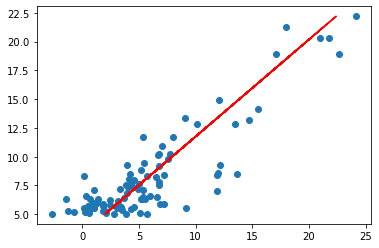

In [11]:
plt.scatter(np.array(y) , data['x'])
plt.plot(np.array(X * theta.T) , np.array(data['x']) , color='red')
plt.show()

In [12]:
type(hypothisis(X, theta)) , type(np.matrix(data['x']))

(numpy.matrix, numpy.matrix)

In [13]:
# Mean Absolute Percentage Error (MAPE)
acc = np.sum(abs(y - hypothisis(X, theta)) / y) * (100/np.shape(X)[0])
acc

125.66451819782824

In [ ]:
#final virsion without b_p bug
class N_Net():
    
    def __init__(self, x, y, n_h, n_u):
        self.x = x
        self.y = y
        self.n_h = n_h
        self.n_u = n_u

    def define_parameters(self):
        x = self.x
        n_h = self.n_h
        n_u = self.n_u
        
        i_l = np.shape(x)[0]   # n = features
        w, b= [], []
        for i in range(n_h):
            w.append((np.random.randn(n_u[i], i_l) * 0.01).tolist())
            i_l = n_u[i]
            b.append((np.zeros((n_u[i],1))).tolist())
        return w, b
    
    def forward_prapogation(self,x ,w, b):
        z, a = [], []
    #loop
        for i in range(len(w)):
            if i == 0:
                z.append(np.dot(w[i], x) + b[i])
                a.append(sigmoid(z[i]))
            else:
                z.append(np.dot(w[i], z[i-1]) + b[i])
                a.append(sigmoid(z[i]))
        return z, a
    
    def backward_propogation(self, z, a, w):
        dz, dw, db = [], [], []
        x, y = self.x, self.y
        
        #loop
        for i in range(len(w)):
            if i == 0:
                if np.shape(a[-1]) != np.shape(y):
                    print("check your 'y' !!!!")
                    break
                dz.append(a[i-1] - y)
                dw.append(np.dot(dz[i] , np.array(a[i-2]).T))
                db.append(np.sum(dz[i], axis=1,  keepdims=True))
                
            elif i == len(w)-1:
                dz.append(np.dot(np.array(w[-i]).T , dz[i-1])) #, (1 - np.power(a[i-1],2))
                dw.append(np.dot(dz[i], x.T))
                db.append(np.sum(dz[i], axis=1,  keepdims=True))
                
            else:
                dz.append(np.dot(np.array(w[-i]).T , dz[i-1]))   #, (1 - np.power(a[i-1],2))
                dw.append(np.dot(dz[i], np.array(a[-i-2]).T))
                db.append(np.sum(dz[i], axis=1,  keepdims=True))
                
        return np.flip(dw), np.flip(db), np.flip(dz)
    
    def model(self, itteration = 1000, alfa = 0.01):
        x = self.x 
        m = np.shape(x)[1]
        w, b = self.define_parameters()
        
        for i in tqdm(range(itteration)):
            
            z, a = self.forward_prapogation(x, w, b)
            dw, db, dz = self.backward_propogation(z, a, w)
            
            dw, db = dw/m, db/m
            
            temp_w = w - (alfa * dw)
            temp_b = b - (alfa * db)
            w, b = temp_w, temp_b
        
        return w, b